## Confidence Intervals

When examining sample means as we have been for the *t*-test, a useful statistical tool is the **confidence interval** (CI), which we for example often see associated with polling results when there's an upcoming election. CIs allow us to make statements such as "there is a 95% chance that the population mean lies within this particular range of values".

We can calculate a CI by rearranging the *z*-score formula:
$$ \text{C.I.} = \bar{x} \pm z \frac{s}{\sqrt{n}} $$
Where:
* $\bar{x}$ is the sample mean
* $s$ is the sample standard deviation
* $n$ is the sample size
* $z$ corresponds to a *z*-score threshold (e.g., the most common 95% CI is $z \pm 1.960$; other popular ones are the 90% CI at $z \pm 1.645$ and the 99% CI at $z \pm 2.576$)

For example, to find the 95% confidence interval for the true mean yield of our GMO yeast:

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x = np.array([48, 50, 54, 60, 49, 55, 59, 62])
xbar = np.mean(x)
s = x.std()
n = len(x)

In [4]:
z = 1.96

In [5]:
def CI_err_calc(my_z, my_s, my_n):
    return my_z * (my_s / my_n**0.5)


In [7]:
ci_err = CI_err_calc(z, s, n)
ci_plus = xbar + ci_err
ci_minus = xbar - ci_err
ci_plus, ci_minus

(np.float64(58.08874030132168), np.float64(51.16125969867832))

Therefore, there's a 95% chance that the true mean yield of our GMO yeast lies in the range of 51.2 to 58.1 liters. Since this CI doesn't overlap with the established baseline mean of 50L, this corresponds to stating that the GMO yield is significantly greater than the baseline where $\alpha = .05$, as we already determined:

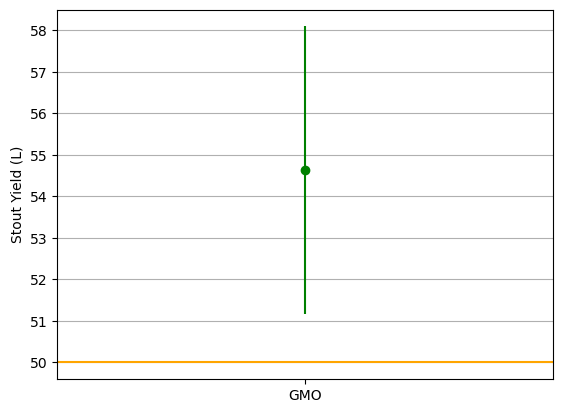

In [9]:
fig, ax = plt.subplots()
plt.ylabel('Stout Yield (L)')
plt.grid(axis='y')
ax.errorbar(['GMO'], [xbar], [ci_err], fmt='o', color='green')
_ = ax.axhline(50, color='orange')

Similarly, we can compare several sample means with CIs. Using our penguins again:

In [10]:
penguins = sns.load_dataset("penguins").dropna() # drop missing values
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [13]:
adelie = penguins[penguins["species"] == "Adelie"]
f = adelie[adelie["sex"] == "Female"].body_mass_g.to_numpy() / 1000
m = adelie[adelie["sex"] == "Male"].body_mass_g.to_numpy() / 1000
sf = f.var(ddof=1)
sm = m.var(ddof=1)
nf = len(f)
nm = len(m)
fbar = f.mean()
mbar = m.mean()


In [ ]:
f_ci_err = CI_err_calc(z, sf, nf)
m_ci_err = CI_err_calc(z, sm, nm)

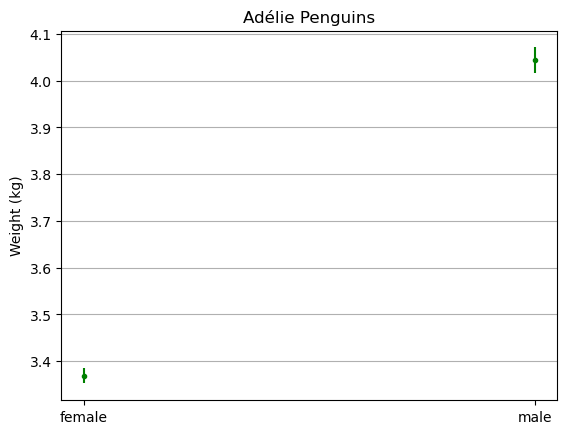

In [15]:
fig, ax = plt.subplots()
plt.title('Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['female', 'male'], [fbar, mbar], [f_ci_err, m_ci_err],
                fmt='.', color='green')

The CIs are nowhere near overlapping, corresponding to the extremely significant (-log*P* $\approx 25$) difference in penguin weight.

In contrast, the CIs for female penguins from the three islands...

In [16]:
t = adelie[(adelie.sex == 'Female') & (adelie.island == 'Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex == 'Female') & (adelie.island == 'Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['body_mass_g'].to_numpy()/1000

means = [t.mean(), b.mean(), d.mean()]
s_t, sb, sd = t.var(ddof=1), b.var(ddof=1), d.var(ddof=1) # s_t to disambiguate stats package
nt, nb, nd = len(t), len(b), len(d)

ci_errs = [CI_err_calc(z, s_t, nt), CI_err_calc(z, sb, nb), CI_err_calc(z, sd, nd)]

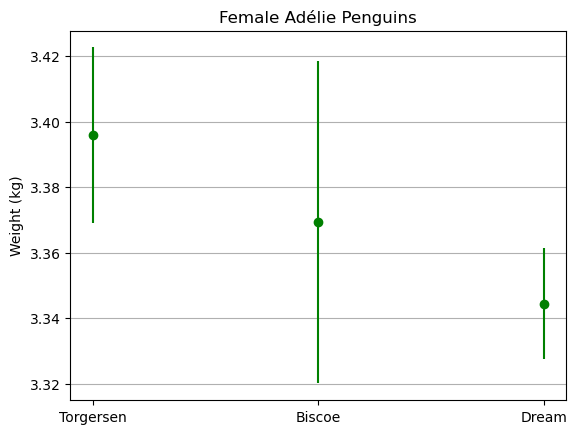

In [17]:
fig, ax = plt.subplots()
plt.title('Female Adélie Penguins')
plt.ylabel('Weight (kg)')
plt.grid(axis='y')
_ = ax.errorbar(['Torgersen', 'Biscoe', 'Dream'], means, ci_errs,
                fmt='o', color='green')